<h1><b><center>Wine Classification</center></b></h1>

---
<font size="2" face="Verdana"> O presente projeto de Machine Learning tem por objetivo a apresentação de um modelo de classificação de vinhos, especificamente, classificar entre Vinho Branco ou Vinho "Vermelho"(Tinto) com base nas características definidas no dataset.


Por: <strong>Felipe Alves Cardozo</strong>
</font>



<p  align=center><br><img src='https://i0.wp.com/wineonmytime.com/wp-content/uploads/2019/09/Can-You-Mix-Red-and-White-Wine-Hero.png?fit=1200%2C475' widht='100%'></p>

# Importação dos Dados

<font size="2" face="Verdana">Neste projeto, será implementado um algoritmo de Classificação no dataset.
    

Os dados podem ser obtidos clicando neste [Link](https://www.kaggle.com/datasets/dell4010/wine-dataset)
    
</font>

In [59]:
# Importando as bibliotecas 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier


<font size="2" face="Verdana">O Dataset é composto por um arquivo com **Treze** colunas, compondo as informações especificas de vinhos, das quais tem como significado:

**Dicionário das Variáveis**

1. `fixed_acidity:` Referente a acidez fixa contida
2. `volatile_acidity:` Quanto à acidez volátil 
3. `citric_acid:` Trata do componente de ácido cítrico composto no vinho
4. `residual_sugar:` Quanto ao Açucar Residual contido no vinho
5. `chlorides:` Trata dos cloretos 
6. `free_sulfur_dioxide:` Quanto ao dióxido de enxofre livre
7. `total_sulfur_dioxide:` Quanto ao dióxido de enxofre total
8. `density:` Trata da densidade
9. `pH:` Valor correspondente ao PH encontrado
10. `sulphates:` Refere-se aos Sulfatos
11. `alcohol:` Teor de Alcool contido no vinho
12. `quality:` Trata da qualidade definida
13. `style:` Tipo do vinho (Branco ou Vermelho)
    
</font>

In [60]:
# Importando os dados
dataset = pd.read_csv('wine_dataset.csv')

# Exibindo os primeiros valores do dataset
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


# Análise Exploratória dos Dados

<font size="2" face="Verdana">O Dataset é pequeno possuindo **6497** linhas e **13** colunas, representando dados de **dois** tipos de vinho, sendo de **White** e **Red**. 

Por se tratar de uma base pequena, não existem muitos tratamentos a serem feitos, o foco será na aplicação do modelo de Machine Learning a fim de classificar os dados em questão.</font>

In [61]:
# Verificando a dimensão do Dataset
print("DIMENSÕES DO DATAFRAME:\n")
print(f'A base de dados possui {dataset.shape[0]} linhas')
print(f'A base de dados possui {dataset.shape[1]} colunas')

DIMENSÕES DO DATAFRAME:

A base de dados possui 6497 linhas
A base de dados possui 13 colunas


<font size="2" face="Verdana"> Verificando o resumo das informações do dataset, observa-se que **não existem** valores nulos, a contagem total corresponde ao esperado e os tipos estão no padrão numérico, a fim de tornar a classificação mais acertiva. A única exceção está na coluna `style` que esta com o tipo objeto, ou seja, valores textuais nesse caso.

Sendo assim será necessária a troca dos valores por valores numéricos, tendo em vista que a coluna será o _Target_ do modelo.</font>

In [62]:
# Resumindo as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


<font size="2" face="Verdana"> Antes da troca do target por valores numéricos, vou criar uma representação gráfica a fim de demonstrar a distribuição dos valores no dataset. Existe uma diferença na qunatidade que pode ser considerado um desbalanceamento mas não farei essa intervenção no momento.
    
</font>

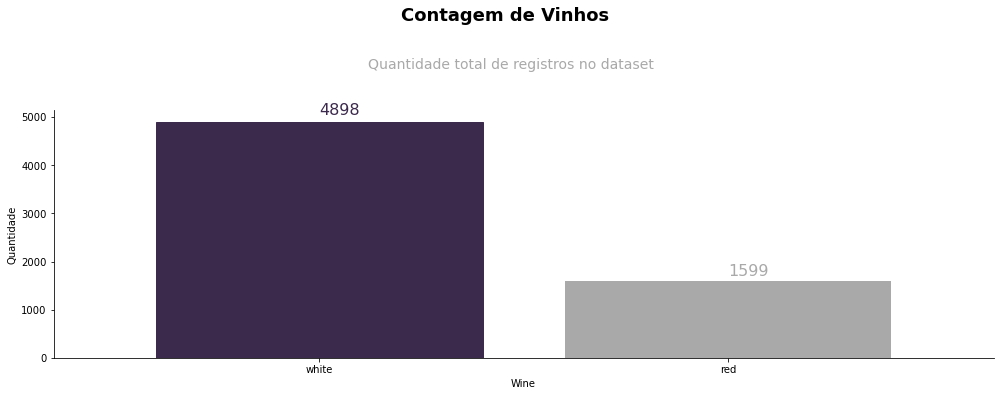

In [63]:
dataset_count = dataset['style'].value_counts()
dataset_count

# cores
azul = '#3c2a4d'
cinza = '#a9a9a9'

fig, ax = plt.subplots(figsize=(14,6))

dataset_count.plot(kind='bar', width=0.8, ax=ax, color=cinza)

ax.set_ylabel('Quantidade')
ax.set_xlabel('Wine')

# Remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0.2, 7000,
        "Contagem de Vinhos",
        fontsize=18, 
        color='black',
        weight='bold')

# Subtítulo
plt.text(0.12, 6000,
        "Quantidade total de registros no dataset ", 
        fontsize=14,
        color=cinza)

# rótulo
plt.text(0, 5050,
        "4898",
        fontsize=16,
        color=azul)

# rótulo
plt.text(1, 1700,
        "1599",
        fontsize=16,
        color=cinza)


plt.xticks(rotation = 0, ha='center')
ax.get_children()[0].set_color(azul) 
plt.tight_layout()

<font size="2" face="Verdana"> Agora sim, farei a alteração dos valores target para o tipo numérico, Os valores serão `0` para o vinho de tipo **Red** e `1` para o vinho do tipo **White**.
    
Em seguida é validada a alteração com uma nova consulta das primeiras entradas.

</font>

In [64]:
# Alterando a Variável target para valores numéricos
dataset['style'] = dataset['style'].replace('red',0)
dataset['style'] = dataset['style'].replace('white',1)

In [65]:
dataset.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


# Aplicação do Modelo de Machine Learning

<font size="2" face="Verdana"> Após uma breve análise exploratória e alguns ajustes no dataset, farei a divisão das variáveis em treino e teste e em seguida o treinamento do modelo.
    
</font>

In [66]:
# Separando as variáveis de treino e teste

y = dataset['style']
x = dataset.drop('style', axis=1)

In [67]:
# Separando o conjunto de dados em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.3) 

<font size="2" face="Verdana"> Escolhi para essse conjunto de dados o modelo de árvore de decisão, onde, nesse caso, 
o estimador ajusta várias arvores de decisões aleatórias a fim de se obter o melhor resutado de classificação.

</font>

In [68]:
# Criando o modelo
modelo = ExtraTreesClassifier()
modelo.fit(x_treino, y_treino)

# Imprimindo os resultados
resultado = modelo.score(x_teste, y_teste)
print(f'Acurácia: {resultado * 100:.2f} %')

Acurácia: 99.54 %


<font size="2" face="Verdana"> Agora coletando uma pequena amostra aleatória de **Cinco** entradas a fim de verificar se o modelo está conseguindo acertar na sua classificação, Podemos observar que esse trecho de dados de teste mostram mais valores do tipo "RED" que "WHITE".
    
</font>

In [69]:
# Visualizado um trecho dos dados que serão testados no modelo
y_teste[300:305]

3696    1
927     0
3469    1
3357    1
4603    1
Name: style, dtype: int64

In [70]:
# Visualizado um trecho dos dados que serão testados no modelo
x_teste[300:305]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
3696,6.7,0.24,0.33,12.3,0.046,31.0,145.0,0.99830,3.36,0.40,9.5,5
927,8.4,0.67,0.19,2.2,0.093,11.0,75.0,0.99736,3.20,0.59,9.2,4
3469,6.3,0.19,0.21,1.8,0.049,35.0,163.0,0.99240,3.31,0.50,10.3,6
3357,9.6,0.21,0.28,1.2,0.038,12.0,53.0,0.99260,2.80,0.46,10.6,5
4603,6.3,0.18,0.36,1.2,0.034,26.0,111.0,0.99074,3.16,0.51,11.0,6


<font size="2" face="Verdana">Agora aplicaremos a previsão em valores testes, especificando um intervalo de valores a fim de verificar se o modelo está bem treinado e atendendo os critérios. Nesse caso o acerto chega a 100 % e isso se dá pelo fato de o dataset ser pequeno, o que não é um problema, tendo em vista que este é um modelo de estudos.
    
</font>

In [71]:
# fazendo uma previsão teste de um trecho
previsao = modelo.predict(x_teste[300:305])

In [72]:
previsao

array([1, 0, 1, 1, 1], dtype=int64)

# Conclusão

<font size="2" face="Verdana"> Esta análise proporcionou uma visão bem ampla e interessante dos dados, com alguns poucos comandos consegui identificar diversas informações e aplicar ajustes essenciais para um processamento do modelo.

O objetivo da análise de dados é de enxergar oportunidades e trazer os insights necessários para uma eventual decisão, além da aplicação de modelos de Machine learning a fim de garantir uma maior acertividade, neste caso, na classificação de dados.
<br><br>
  
Com isso concluo a análise e aplicação do modelo.
</font>